In [1]:
import mplfinance as mpf
import requests
import pandas as pd
import re
import time


import plotly.graph_objects as go
import plotly.subplots as ms
import talib
import matplotlib.pyplot as plt     # 점찍기용


import matplotlib.pyplot as plt    # 히트맵용
import seaborn as sns              # 히트맵용
import numpy as np
from pandas import Series, DataFrame

In [2]:
test1 = pd.read_csv('004690.KS.csv', encoding='cp949')    ########## CSV 불러오기
test1 = test1[['Date', 'Close', 'Volume']]    # 필요한 칼럼만 가져오기
test2 = pd.read_csv('게시글_004690.csv', encoding='cp949')    ########## CSV 불러오기

test1.index = pd.DatetimeIndex(test1['Date'])    # 인덱스 지정
test2.index = pd.DatetimeIndex(test2['날짜'])    # 인덱스 지정


# 날짜 결측값 'NaN'
test1 = test1.resample('D').last().fillna(value = 'NaN') ## 주가 결측치 = NaN
test2 = test2.resample('D').last().fillna(value = '0') ## 게시글 결측치 = 0


m = test2.join(test1)    # 합치기
m = m.rename(columns={'날짜': 'naver_date', '게시글': 'Post'})    # 칼럼 이름 수정



m.tail(30)

,naver_date,Post,Date,Close,Volume
날짜,,,,,
2023-04-02,2023-04-02,2.0,NaN,NaN,NaN
2023-04-03,2023-04-03,5.0,2023-04-03,518000.0,20110.0
2023-04-04,2023-04-04,1.0,2023-04-04,518000.0,13545.0
2023-04-05,2023-04-05,4.0,2023-04-05,516000.0,20225.0
2023-04-06,2023-04-06,3.0,2023-04-06,520000.0,13539.0
2023-04-07,2023-04-07,3.0,2023-04-07,517000.0,17254.0
2023-04-08,0,0,NaN,NaN,NaN
2023-04-09,0,0,NaN,NaN,NaN
2023-04-10,2023-04-10,3.0,2023-04-10,514000.0,21232.0


In [3]:
m1 = m.tail(29)          ####################
m1

,naver_date,Post,Date,Close,Volume
날짜,,,,,
2023-04-03,2023-04-03,5.0,2023-04-03,518000.0,20110.0
2023-04-04,2023-04-04,1.0,2023-04-04,518000.0,13545.0
2023-04-05,2023-04-05,4.0,2023-04-05,516000.0,20225.0
2023-04-06,2023-04-06,3.0,2023-04-06,520000.0,13539.0
2023-04-07,2023-04-07,3.0,2023-04-07,517000.0,17254.0
2023-04-08,0,0,NaN,NaN,NaN
2023-04-09,0,0,NaN,NaN,NaN
2023-04-10,2023-04-10,3.0,2023-04-10,514000.0,21232.0
2023-04-11,0,0,2023-04-11,506000.0,31089.0


In [4]:
post = m1.Post.to_list()     ########## 추가

In [5]:
date = m1.index.to_list()     ########## 추가

In [6]:
len(post)     ########## 추가

29

In [7]:
plot_x, plot_y = [], []     ########## 추가

for i in range(len(post)):
    if post[i] != "NaN":
        plot_x.append(date[i])
        plot_y.append(float(post[i]))

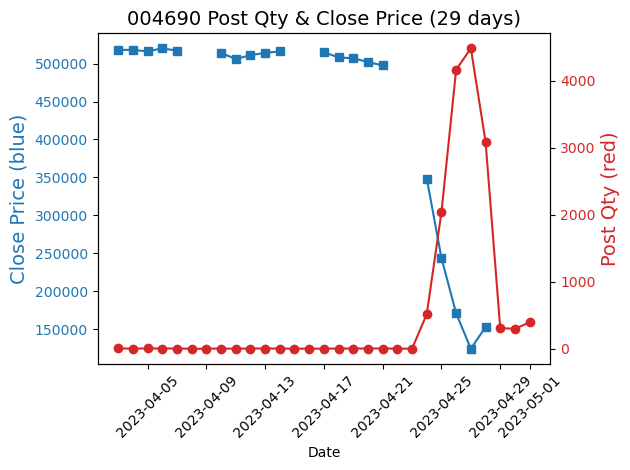

In [8]:
## plot with 2 different axes for a dataset with different scales


# left side
fig, ax1 = plt.subplots()
color_1 = 'tab:blue'
ax1.set_title('004690 Post Qty & Close Price (29 days)', fontsize=14)
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price (blue)', fontsize=14, color=color_1)

ax1.plot(m1.index, m1.Close, marker='s', color=color_1)     #####
ax1.tick_params(axis='y', labelcolor=color_1)
ax1.tick_params(axis='x', rotation=45) #####



# right side with different scale
ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:red'
ax2.set_ylabel('Post Qty (red)', fontsize=14, color=color_2)

ax2.plot(plot_x, plot_y, marker='o', color=color_2)     #####
#ax2.plot(m1.index.astype(str), m1.Post, marker='o', color=color_2)
#ax2.plot([d.strftime('%Y-%m-%d') for d in m1.index], m1.Post, marker='o', color=color_2)
ax2.tick_params(axis='y', labelcolor=color_2)





fig.tight_layout()

plt.show()

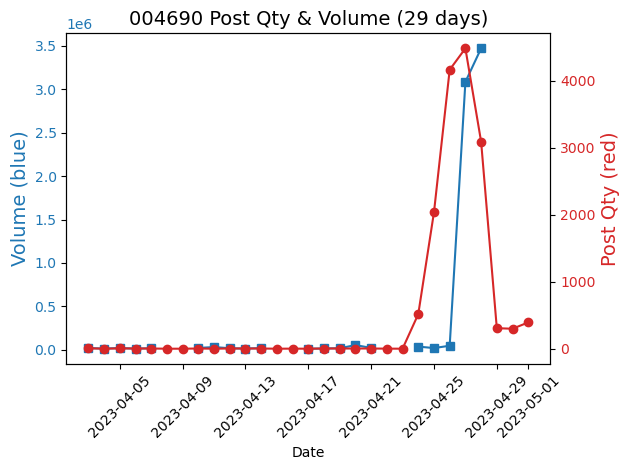

In [9]:
## plot with 2 different axes for a dataset with different scales


# left side
fig, ax1 = plt.subplots()
color_1 = 'tab:blue'
ax1.set_title('004690 Post Qty & Volume (29 days)', fontsize=14)
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume (blue)', fontsize=14, color=color_1)

ax1.plot(m1.index, m1.Volume, marker='s', color=color_1)     #####
ax1.tick_params(axis='y', labelcolor=color_1)
ax1.tick_params(axis='x', rotation=45) #####


# right side with different scale
ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:red'
ax2.set_ylabel('Post Qty (red)', fontsize=14, color=color_2)

ax2.plot(m1.index, m1.Post, marker='o', color=color_2)     #####
ax2.tick_params(axis='y', labelcolor=color_2)



fig.tight_layout()

plt.show()

### 